# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3   

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
#Needed to visually see where I pulled the price from
btc_response = requests.get(btc_url).json()
print(json.dumps(btc_response, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19125212,
            "total_supply": 19125212,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 23072.0,
                    "volume_24h": 20875401241,
                    "market_cap": 444589675847,
                    "percentage_change_1h": -0.897957072671213,
                    "percentage_change_24h": -1.45926069168134,
                    "percentage_change_7d": -3.66182161100233,
                    "percent_change_1h": -0.897957072671213,
                    "percent_change_24h": -1.45926069168134,
                    "percent_change_7d": -3.66182161100233
                }
            },
            "last_updated": 1660868077
        }
    },
    "metadata": {
        "timestamp": 1660868077,
        "num_c

In [6]:
#Needed to visually see where I pulled the price from
eth_response = requests.get(eth_url).json()
print(json.dumps(eth_response, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120152442,
            "total_supply": 120152442,
            "max_supply": 120152442,
            "quotes": {
                "USD": {
                    "price": 1833.52,
                    "volume_24h": 13227174756,
                    "market_cap": 222242916973,
                    "percentage_change_1h": -1.45889633957769,
                    "percentage_change_24h": -0.167961558957905,
                    "percentage_change_7d": -2.54608225589578,
                    "percent_change_1h": -1.45889633957769,
                    "percent_change_24h": -0.167961558957905,
                    "percent_change_7d": -2.54608225589578
                }
            },
            "last_updated": 1660868013
        }
    },
    "metadata": {
        "timestamp": 1660868013,
   

In [7]:
# Fetch current BTC price
btc_price = btc_response['data']['1']['quotes']['USD']['price']
print(btc_price)
# Fetch current ETH price
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
print(eth_price)

# # Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# # Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

23072.0
1833.52
The current value of your 1.2 BTC is $27686.40
The current value of your 5.3 ETH is $9717.66


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [10]:
# Format current date as ISO format
today=pd.Timestamp("2022-08-12", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start=today,
    end=today
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                   \
                             open    high     low   close   volume   
timestamp                                                            
2022-08-12 04:00:00+00:00  102.97  103.12  102.72  103.12  3628312   

                                                     SPY                  \
                          trade_count        vwap   open    high     low   
timestamp                                                                  
2022-08-12 04:00:00+00:00       16069  102.954114  422.1  427.21  421.03   

                                                                    
                           close    volume trade_count        vwap  
timestamp                                                           
2022-08-12 04:00:00+00:00  427.1  61456095      396459  424.557629

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $103.12
Current SPY closing price: $427.1


In [12]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21355.00
The current value of your 200 AGG shares is $20624.00


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value

#df_savings = pd.DataFrame({"crypto": crypto_value, "shares": shares_value})
df_savings = pd.DataFrame([crypto_value, shares_value], index =["crypto","share"],  columns = ["Amount"])

# Display savings DataFrame
display(df_savings)

,Amount
crypto,37404.056
share,41979.000


<AxesSubplot:title={'center':'Stock/Crypto Portfolio Comparasion'}, ylabel='Amount'>

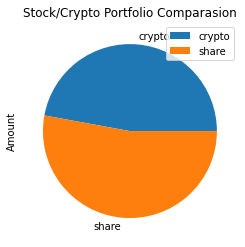

In [14]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title= "Stock/Crypto Portfolio Comparasion")

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
# Calculate total amount of savings
total_savings = crypto_value + shares_value
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations for for having enough money in savings")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goals")
else:
    print("You this far away from reaching your financial goals", "$", emergency_fund - total_savings)

Congratulations for for having enough money in savings


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [19]:
# Printing the simulation input data
MC_portfolio_dist.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\rtg547\OneDrive\Documents\FinTech\finance_planner\financial_planner_challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995300,1.006728,0.998229,1.001654,1.009984,0.998681,0.998040,0.997445,0.987524,1.004935,...,1.012027,0.989319,0.993259,1.004517,0.997419,1.002599,1.002522,0.990897,0.992168,0.999224
2,0.995976,1.008272,0.998575,1.012121,1.020091,0.999458,1.000717,0.999013,0.988174,1.014274,...,1.016738,0.988700,0.992486,1.010416,1.000401,1.010107,1.001417,0.998345,0.995361,0.993071
3,0.993594,1.007541,0.998237,1.011853,1.012848,1.002253,0.994649,1.002541,0.985960,1.023082,...,1.013258,0.972633,0.990592,1.016460,0.989524,1.015275,1.002823,0.987364,1.002080,1.006630
4,0.997860,0.996385,1.007954,1.012301,1.014641,0.983882,0.984789,1.013353,0.994561,1.016705,...,1.012429,0.965140,0.992356,1.025012,0.996225,1.021857,0.997610,0.989795,1.003337,1.006599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.254173,9.305912,23.307277,49.655545,42.189383,20.907840,15.508810,22.251937,14.659740,4.604799,...,5.822471,20.603650,29.137423,9.012969,5.036316,10.217105,15.854719,27.060647,8.766491,6.157146
7557,11.268724,9.287009,23.378354,49.083841,42.550482,21.123721,15.534052,22.120438,14.575499,4.627151,...,5.877551,20.701738,28.687815,9.251678,5.047684,10.258306,15.932361,26.985742,8.743898,6.136676
7558,11.116570,9.217242,23.492601,48.752653,42.797972,21.189173,15.579925,22.165711,14.523734,4.593115,...,5.818219,20.743146,28.789152,9.311314,5.024895,10.213246,15.902329,26.898211,8.762976,6.131283
7559,11.229069,9.197995,23.674903,48.380412,42.750922,21.318830,15.783590,22.145756,14.637175,4.612000,...,5.811329,20.689881,29.064304,9.216660,5.019645,10.164800,16.061357,27.012617,8.757235,6.145167


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

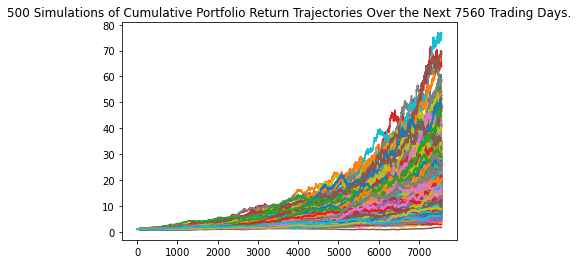

In [21]:
# Plot simulation outcomes
MC_portfolio_dist.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

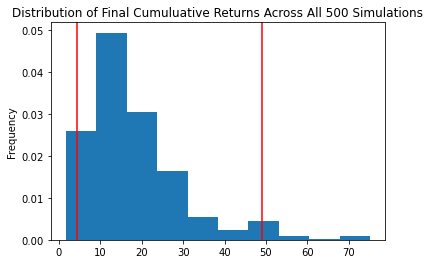

In [22]:
# Plot probability distribution and confidence intervals
MC_portfolio_dist.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
retirement_stat = MC_portfolio_dist.summarize_cumulative_return()

# Print summary statistics
print(retirement_stat)

count           500.000000
mean             18.055124
std              11.481927
min               1.672076
25%              10.068816
50%              15.389728
75%              22.640634
max              75.129779
95% CI Lower      4.485345
95% CI Upper     49.019070
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
retirement_ci_lower = round(retirement_stat[8]*initial_investment, 2)
retirement_ci_upper = round(retirement_stat[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${retirement_ci_lower} and ${retirement_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $89706.89 and $980381.4


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment_alt = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
retirement_alt_ci_lower = round(retirement_stat[8]*initial_investment_alt,2)
retirement_alt_ci_upper = round(retirement_stat[9]*initial_investment_alt,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_alt} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${retirement_alt_ci_lower} and ${retirement_alt_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $134560.34 and $1470572.1


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_early_retirement = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10, .90],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [27]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_early_retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\rtg547\OneDrive\Documents\FinTech\finance_planner\financial_planner_challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.981920,0.997765,0.997783,1.008618,0.998171,1.019046,0.997309,0.989868,1.009066,1.006084,...,0.985006,1.006563,1.016200,0.972365,0.995619,0.985719,0.989329,1.001811,0.978962,1.000625
2,0.986700,1.005564,1.005537,1.010463,0.998371,1.021642,0.988065,0.980208,1.038206,1.015744,...,0.989191,0.997530,1.012712,0.954707,0.987517,0.975267,0.982613,1.012222,0.976441,0.972327
3,0.981642,1.000787,0.992354,1.021270,0.988832,1.005489,0.973606,0.980962,1.041210,1.030284,...,0.993890,1.004507,1.008035,0.951779,0.980446,0.986325,0.973443,1.026364,0.978761,0.978271
4,0.971094,1.007133,1.018208,1.024797,1.008734,1.016029,0.970676,0.977019,1.028708,1.040022,...,0.991520,1.001245,1.015956,0.935666,0.971995,0.977549,0.970938,1.017241,0.995028,0.989126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.013686,1.418813,3.356969,1.828904,1.828941,1.696912,2.835345,2.207345,1.514053,1.820608,...,1.838047,1.692442,1.944003,1.733609,3.746443,1.373748,2.203205,1.581443,1.881769,2.236055
1257,3.067802,1.402025,3.402613,1.824843,1.844300,1.705462,2.856862,2.210299,1.513873,1.835172,...,1.883835,1.663720,1.912644,1.742463,3.815346,1.363897,2.158674,1.607934,1.864164,2.238736
1258,3.064267,1.410271,3.424483,1.854041,1.813636,1.717921,2.801955,2.244928,1.503580,1.846863,...,1.881198,1.650588,1.878607,1.750282,3.795019,1.372735,2.168143,1.620338,1.868120,2.229910
1259,3.086434,1.409468,3.417234,1.850814,1.833511,1.754805,2.776871,2.220132,1.503112,1.840117,...,1.871557,1.663044,1.866235,1.792043,3.711688,1.390369,2.151030,1.628064,1.868456,2.196327


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

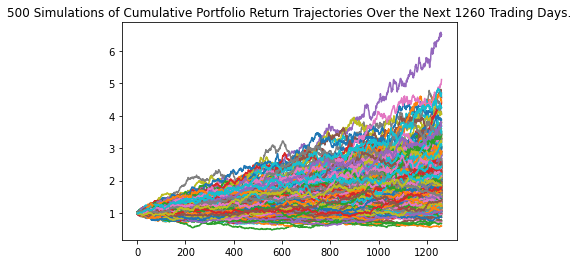

In [28]:
# Plot simulation outcomes
MC_early_retirement.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

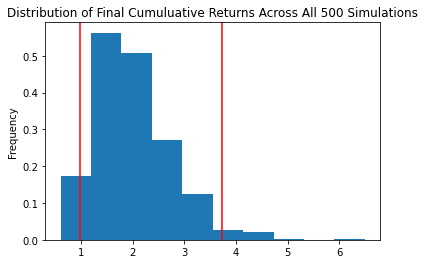

In [29]:
# Plot probability distribution and confidence intervals
MC_early_retirement.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
early_retirement_stat = MC_early_retirement.summarize_cumulative_return()

# Print summary statistics
print(early_retirement_stat)

count           500.000000
mean              2.009155
std               0.748998
min               0.598601
25%               1.506880
50%               1.859870
75%               2.389327
max               6.497653
95% CI Lower      0.967759
95% CI Upper      3.733168
Name: 1260, dtype: float64


In [31]:
# Set initial investment
early_retirement_int_investment = 25000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
early_retirement_ci_lower = round(early_retirement_stat[8]*initial_investment, 2)
early_retirement_ci_upper = round(early_retirement_stat[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${early_retirement_int_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${early_retirement_ci_lower} and ${early_retirement_ci_upper}")

There is a 95% chance that an initial investment of $25000 in the portfolio over the next 5 years will end within in the range of $19355.18 and $74663.36


### Ten Years Retirement Option

In [32]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_early_retirement_2 = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.10, .90],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [33]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_early_retirement_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\rtg547\OneDrive\Documents\FinTech\finance_planner\financial_planner_challenge\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005478,0.986273,1.003504,0.987621,1.008022,0.995771,0.983054,0.990353,0.977335,1.008367,...,1.010682,1.011960,0.987234,0.989887,0.993223,0.989789,1.010219,0.987974,1.000279,0.998915
2,1.003914,0.993116,1.006193,0.972600,1.014625,0.989969,0.988427,0.991938,0.981491,1.004865,...,1.012739,1.044023,1.006644,0.996941,0.991520,0.988086,1.010957,0.993402,1.004147,0.999333
3,0.983638,0.984565,1.002637,0.973224,1.021764,0.996945,0.977214,1.010274,0.977504,0.994012,...,0.981584,1.072133,0.987481,1.005433,0.998712,0.986799,0.992713,0.998079,1.014725,1.007970
4,0.990585,0.991452,1.000285,0.970233,1.032305,0.995506,0.971516,1.023932,0.958246,1.015637,...,0.984737,1.072533,0.982801,1.013130,1.001571,0.996371,0.998553,1.008368,1.003683,1.003772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.467789,3.990252,2.994668,1.282632,2.256867,1.578980,2.107342,1.763730,3.053055,1.541672,...,2.789199,2.814515,2.018861,1.999630,2.496930,1.876813,1.822701,1.388631,1.512633,1.656499
1257,1.457423,4.007407,2.969454,1.301783,2.243313,1.593683,2.142085,1.765839,3.072341,1.563313,...,2.718258,2.808156,2.037638,1.970976,2.521975,1.899054,1.820568,1.388332,1.517388,1.639028
1258,1.441511,4.045052,2.915517,1.287623,2.230239,1.604045,2.139133,1.741647,3.079908,1.552748,...,2.716007,2.847205,2.014844,1.969490,2.532744,1.882801,1.783587,1.387516,1.508648,1.628716
1259,1.455052,4.083773,2.944135,1.279045,2.153846,1.595711,2.091668,1.731179,3.075342,1.561284,...,2.679747,2.774948,2.019113,1.971946,2.506743,1.920886,1.826475,1.395238,1.496039,1.661976


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

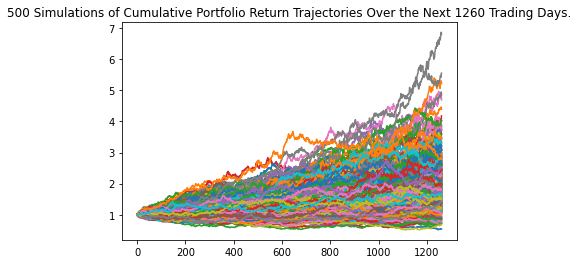

In [34]:
# Plot simulation outcomes
MC_early_retirement_2.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

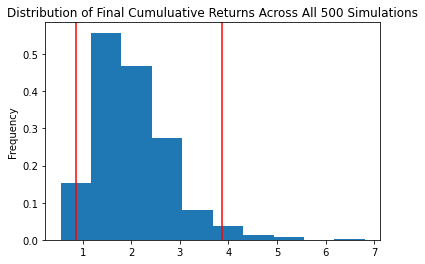

In [35]:
# Plot probability distribution and confidence intervals
MC_early_retirement_2.plot_distribution()

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
early_retirement_stat_2 = MC_early_retirement_2.summarize_cumulative_return()

# Print summary statistics
print(early_retirement_stat_2)

count           500.000000
mean              2.008559
std               0.789514
min               0.540720
25%               1.440703
50%               1.898666
75%               2.432137
max               6.811110
95% CI Lower      0.869250
95% CI Upper      3.864775
Name: 1260, dtype: float64


In [37]:
# Set initial investment
early_retirement_int_investment_2 = 25000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
early_retirement_ci_lower_2 = round(early_retirement_stat_2[8]*initial_investment, 2)
early_retirement_ci_upper_2 = round(early_retirement_stat_2[9]*initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${early_retirement_int_investment_2} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${early_retirement_ci_lower_2} and ${early_retirement_ci_upper_2}")

There is a 95% chance that an initial investment of $25000 in the portfolio over the next 5 years will end within in the range of $17385.01 and $77295.51
